In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer





In [21]:
df=pd.read_csv(r"C:\Users\vikas\OneDrive\Desktop\youtube_dataset.csv") #loading the dataset

In [22]:
df.head()

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,The people who liked this comment is officiall...,2020-08-10T20:00:43Z,98280
1,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgyiccblP3A16aixpit4AaABAg,MrCrazy,"- Wait, it's 7B views\n- Always has been",2020-09-07T20:52:36Z,773
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugx7THW3EBNJlhJuwSB4AaABAg,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?...,2019-11-21T03:23:32Z,356081
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzXUsI6yrRjTKNASf94AaABAg,Srivathsa D,Let's be honest this wasn't your recommendatio...,2020-09-09T03:41:34Z,13
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxCu6mywg6uqjueHQ14AaABAg,1k Subscribers Challenge Without Any Video,Types Of People:\n10% Enjoying Song \n90% Chec...,2020-09-08T09:53:24Z,122


In [23]:
df.shape

(19300, 7)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300 entries, 0 to 19299
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Video Name    19300 non-null  object
 1   Channel Name  19300 non-null  object
 2   Comment Id    19300 non-null  object
 3   User Name     19299 non-null  object
 4   Comment       19300 non-null  object
 5   Date          19300 non-null  object
 6   Likes         19300 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19300 entries, 0 to 19299
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Video Name    19300 non-null  object
 1   Channel Name  19300 non-null  object
 2   Comment Id    19300 non-null  object
 3   User Name     19299 non-null  object
 4   Comment       19300 non-null  object
 5   Date          19300 non-null  object
 6   Likes         19300 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [26]:
df.describe()

,Likes
count,19300.000000
mean,2142.412642
std,11795.954843
min,0.000000
25%,2.000000
50%,22.000000
75%,260.000000
max,540334.000000


In [27]:
df.duplicated().sum()

np.int64(139)

In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df.isnull().sum()

Video Name      0
Channel Name    0
Comment Id      0
User Name       1
Comment         0
Date            0
Likes           0
dtype: int64

In [30]:
df.drop=df.drop(['User Name','Comment Id'],axis=1,inplace=True)  

In [31]:
df.shape

(19161, 5)

<Axes: xlabel='Likes', ylabel='Count'>

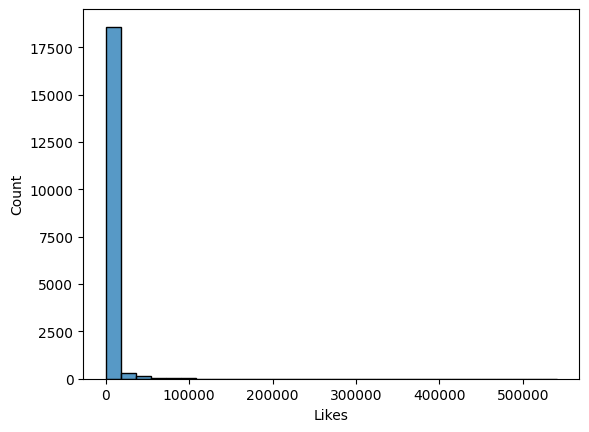

In [32]:
sns.histplot(df['Likes'],bins=30)

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Example DataFrame (aapka df)
# df = pd.read_csv('your_file.csv')

# --- TF-IDF for 'Video Name' ---
tfidf_vname = TfidfVectorizer(max_features=50)  # max_features limit karne ke liye
vname_tfidf = tfidf_vname.fit_transform(df['Video Name'].astype(str))

vname_df = pd.DataFrame(vname_tfidf.toarray(), columns=[f'VideoName_tfidf_{i}' for i in range(vname_tfidf.shape[1])])

# --- TF-IDF for 'Comment' ---
tfidf_comment = TfidfVectorizer(max_features=50)
comment_tfidf = tfidf_comment.fit_transform(df['Comment'].astype(str))

comment_df = pd.DataFrame(comment_tfidf.toarray(), columns=[f'Comment_tfidf_{i}' for i in range(comment_tfidf.shape[1])])

# --- Combine everything ---
df_final = pd.concat([df.reset_index(drop=True), vname_df, comment_df], axis=1)

print(df_final.head())


                                Video Name   Channel Name  \
0  Luis Fonsi - Despacito ft. Daddy Yankee  LuisFonsiVEVO   
1  Luis Fonsi - Despacito ft. Daddy Yankee  LuisFonsiVEVO   
2  Luis Fonsi - Despacito ft. Daddy Yankee  LuisFonsiVEVO   
3  Luis Fonsi - Despacito ft. Daddy Yankee  LuisFonsiVEVO   
4  Luis Fonsi - Despacito ft. Daddy Yankee  LuisFonsiVEVO   

                                             Comment                  Date  \
0  The people who liked this comment is officiall...  2020-08-10T20:00:43Z   
1           - Wait, it's 7B views\n- Always has been  2020-09-07T20:52:36Z   
2  *Teacher: What is the population of the Earth?...  2019-11-21T03:23:32Z   
3  Let's be honest this wasn't your recommendatio...  2020-09-09T03:41:34Z   
4  Types Of People:\n10% Enjoying Song \n90% Chec...  2020-09-08T09:53:24Z   

    Likes  VideoName_tfidf_0  VideoName_tfidf_1  VideoName_tfidf_2  \
0   98280                0.0                0.0                0.0   
1     773               

In [34]:
df_final.head()

,Video Name,Channel Name,Comment,Date,Likes,VideoName_tfidf_0,VideoName_tfidf_1,VideoName_tfidf_2,VideoName_tfidf_3,VideoName_tfidf_4,...,Comment_tfidf_40,Comment_tfidf_41,Comment_tfidf_42,Comment_tfidf_43,Comment_tfidf_44,Comment_tfidf_45,Comment_tfidf_46,Comment_tfidf_47,Comment_tfidf_48,Comment_tfidf_49
0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,The people who liked this comment is officiall...,2020-08-10T20:00:43Z,98280,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.498672,0.0,0.0,0.000000,0.000000
1,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,"- Wait, it's 7B views\n- Always has been",2020-09-07T20:52:36Z,773,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,*Teacher: What is the population of the Earth?...,2019-11-21T03:23:32Z,356081,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.470698,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Let's be honest this wasn't your recommendatio...,2020-09-09T03:41:34Z,13,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.357527,0.487811
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Types Of People:\n10% Enjoying Song \n90% Chec...,2020-09-08T09:53:24Z,122,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000


In [35]:
df_final = df_final.drop(['Video Name', 'Comment'], axis=1)
print(df_final.head())


    Channel Name                  Date   Likes  VideoName_tfidf_0  \
0  LuisFonsiVEVO  2020-08-10T20:00:43Z   98280                0.0   
1  LuisFonsiVEVO  2020-09-07T20:52:36Z     773                0.0   
2  LuisFonsiVEVO  2019-11-21T03:23:32Z  356081                0.0   
3  LuisFonsiVEVO  2020-09-09T03:41:34Z      13                0.0   
4  LuisFonsiVEVO  2020-09-08T09:53:24Z     122                0.0   

   VideoName_tfidf_1  VideoName_tfidf_2  VideoName_tfidf_3  VideoName_tfidf_4  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   VideoName_tfidf_5  VideoName_tfidf_6  ...  Comment_tfidf_40  \
0                0.0            

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_final['Channel_Label'] = le.fit_transform(df_final['Channel Name'])

# Drop original column
df_final.drop(['Channel Name'], axis=1, inplace=True)

print(df_final.head())


                   Date   Likes  VideoName_tfidf_0  VideoName_tfidf_1  \
0  2020-08-10T20:00:43Z   98280                0.0                0.0   
1  2020-09-07T20:52:36Z     773                0.0                0.0   
2  2019-11-21T03:23:32Z  356081                0.0                0.0   
3  2020-09-09T03:41:34Z      13                0.0                0.0   
4  2020-09-08T09:53:24Z     122                0.0                0.0   

   VideoName_tfidf_2  VideoName_tfidf_3  VideoName_tfidf_4  VideoName_tfidf_5  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   VideoName_tfidf_6  VideoName_tfidf_7  ...  Comment_tfidf_41  \
0       

In [37]:
import pandas as pd

# Make sure 'Date' column is in datetime format
df_final['Date'] = pd.to_datetime(df_final['Date'], errors='coerce')

# Extract features
df_final['Year'] = df_final['Date'].dt.year
df_final['Month'] = df_final['Date'].dt.month
df_final['Day'] = df_final['Date'].dt.day
df_final['Hour'] = df_final['Date'].dt.hour
df_final['Minute'] = df_final['Date'].dt.minute
df_final['Second'] = df_final['Date'].dt.second

# Drop the original 'Date' column
df_final.drop(['Date'], axis=1, inplace=True)

print(df_final.head())


    Likes  VideoName_tfidf_0  VideoName_tfidf_1  VideoName_tfidf_2  \
0   98280                0.0                0.0                0.0   
1     773                0.0                0.0                0.0   
2  356081                0.0                0.0                0.0   
3      13                0.0                0.0                0.0   
4     122                0.0                0.0                0.0   

   VideoName_tfidf_3  VideoName_tfidf_4  VideoName_tfidf_5  VideoName_tfidf_6  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   VideoName_tfidf_7  VideoName_tfidf_8  ...  Comment_tfidf_47  \
0                0.0      

In [38]:
df_final.head()

,Likes,VideoName_tfidf_0,VideoName_tfidf_1,VideoName_tfidf_2,VideoName_tfidf_3,VideoName_tfidf_4,VideoName_tfidf_5,VideoName_tfidf_6,VideoName_tfidf_7,VideoName_tfidf_8,...,Comment_tfidf_47,Comment_tfidf_48,Comment_tfidf_49,Channel_Label,Year,Month,Day,Hour,Minute,Second
0,98280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.665245,...,0.0,0.000000,0.000000,60,2020,8,10,20,0,43
1,773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.665245,...,0.0,0.000000,0.000000,60,2020,9,7,20,52,36
2,356081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.665245,...,0.0,0.000000,0.000000,60,2019,11,21,3,23,32
3,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.665245,...,0.0,0.357527,0.487811,60,2020,9,9,3,41,34
4,122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.665245,...,0.0,0.000000,0.000000,60,2020,9,8,9,53,24


In [39]:
df_final.columns

Index(['Likes', 'VideoName_tfidf_0', 'VideoName_tfidf_1', 'VideoName_tfidf_2',
       'VideoName_tfidf_3', 'VideoName_tfidf_4', 'VideoName_tfidf_5',
       'VideoName_tfidf_6', 'VideoName_tfidf_7', 'VideoName_tfidf_8',
       ...
       'Comment_tfidf_47', 'Comment_tfidf_48', 'Comment_tfidf_49',
       'Channel_Label', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'],
      dtype='object', length=108)

In [40]:
scaler = StandardScaler()

# Columns to scale (excluding target)
cols_to_scale = ['Channel_Label', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']

df_final[cols_to_scale] = scaler.fit_transform(df_final[cols_to_scale])

In [42]:
df_final.head()

,Likes,VideoName_tfidf_0,VideoName_tfidf_1,VideoName_tfidf_2,VideoName_tfidf_3,VideoName_tfidf_4,VideoName_tfidf_5,VideoName_tfidf_6,VideoName_tfidf_7,VideoName_tfidf_8,...,Comment_tfidf_47,Comment_tfidf_48,Comment_tfidf_49,Channel_Label,Year,Month,Day,Hour,Minute,Second
0,98280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.665245,...,0.0,0.000000,0.000000,0.076133,0.293405,-0.054186,-0.223067,1.164106,-1.688907,0.773460
1,773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.665245,...,0.0,0.000000,0.000000,0.076133,0.293405,0.478252,-0.561009,1.164106,1.314389,0.370793
2,356081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.665245,...,0.0,0.000000,0.000000,0.076133,-0.822500,1.543129,1.016055,-1.318901,-0.360526,0.140698
3,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.665245,...,0.0,0.357527,0.487811,0.076133,0.293405,0.478252,-0.335714,-1.318901,0.679076,0.255746
4,122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.665245,...,0.0,0.000000,0.000000,0.076133,0.293405,0.478252,-0.448362,-0.442545,1.372144,-0.319493


In [43]:
x=df_final.drop('Likes',axis=1)
y=df_final['Likes']

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
model=XGBRFRegressor(n_estimators=300,     # number of trees
    learning_rate=0.1,    # step size
    max_depth=6,          # tree depth
    subsample=0.8,        # data sample per tree
    colsample_bytree=0.8, # feature sample per tree
    random_state=42,
    objective='reg:squarederror'  # regression objective
)

model.fit(x_train,y_train)




,learning_rate,0.1
,subsample,0.8
,colsample_bynode,0.8
,reg_lambda,1e-05
,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bytree,0.8
,device,None


In [49]:
y_pred = model.predict(x_test)

In [50]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 206429520.00
R² Score: 0.02


In [51]:
X = df_final.drop(['Likes', 'Hour', 'Minute', 'Second'], axis=1)
y = df_final['Likes']

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [54]:
model_rf=RandomForestRegressor(n_estimators=200,random_state=42)
model_rf.fit(x_train,y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [55]:
y_pred = model.predict(x_test)

In [56]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 206429520.00
R² Score: 0.02


In [59]:
x.columns

Index(['VideoName_tfidf_0', 'VideoName_tfidf_1', 'VideoName_tfidf_2',
       'VideoName_tfidf_3', 'VideoName_tfidf_4', 'VideoName_tfidf_5',
       'VideoName_tfidf_6', 'VideoName_tfidf_7', 'VideoName_tfidf_8',
       'VideoName_tfidf_9',
       ...
       'Comment_tfidf_47', 'Comment_tfidf_48', 'Comment_tfidf_49',
       'Channel_Label', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'],
      dtype='object', length=107)

In [61]:
# Assuming X = df_final[columns_list] and y = df_final['Likes']
correlations = {}
columns_list = x.columns.tolist()
for col in columns_list:
    corr = df_final[col].corr(df_final['Likes'])
    correlations[col] = corr

corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['PearsonCorr'])
corr_df['AbsCorr'] = corr_df['PearsonCorr'].abs()
corr_df = corr_df.sort_values(by='AbsCorr', ascending=False)

print(corr_df.head(20))  # top 20 correlated features


                    PearsonCorr   AbsCorr
Year                  -0.187346  0.187346
Month                 -0.154912  0.154912
Day                    0.074479  0.074479
Comment_tfidf_7       -0.037635  0.037635
Comment_tfidf_32      -0.035162  0.035162
VideoName_tfidf_30    -0.034547  0.034547
Comment_tfidf_10      -0.033588  0.033588
Comment_tfidf_38       0.032860  0.032860
Comment_tfidf_49       0.031145  0.031145
Comment_tfidf_20      -0.029966  0.029966
Comment_tfidf_0       -0.029476  0.029476
Comment_tfidf_48       0.026539  0.026539
VideoName_tfidf_22    -0.024490  0.024490
VideoName_tfidf_16    -0.024445  0.024445
VideoName_tfidf_28    -0.024445  0.024445
VideoName_tfidf_11    -0.024380  0.024380
Channel_Label          0.022422  0.022422
Comment_tfidf_14       0.022118  0.022118
VideoName_tfidf_3     -0.021924  0.021924
Comment_tfidf_9       -0.021808  0.021808


In [63]:
cols_to_drop = [
    'Hour', 'Minute', 'Second',  # weak date features
    'Channel_Label',              # if one-hot used
    # TF-IDF columns with very low correlation
    'Comment_tfidf_0', 'Comment_tfidf_9', 'Comment_tfidf_14',
    'Comment_tfidf_20', 'Comment_tfidf_48', 'Comment_tfidf_49',
    'VideoName_tfidf_3', 'VideoName_tfidf_11', 'VideoName_tfidf_16',
    'VideoName_tfidf_22', 'VideoName_tfidf_28', 'VideoName_tfidf_30'
]

x.drop(columns=cols_to_drop, inplace=True)


In [64]:
import numpy as np
y = np.log1p(df_final['Likes'])


In [65]:
x

,VideoName_tfidf_0,VideoName_tfidf_1,VideoName_tfidf_2,VideoName_tfidf_4,VideoName_tfidf_5,VideoName_tfidf_6,VideoName_tfidf_7,VideoName_tfidf_8,VideoName_tfidf_9,VideoName_tfidf_10,...,Comment_tfidf_41,Comment_tfidf_42,Comment_tfidf_43,Comment_tfidf_44,Comment_tfidf_45,Comment_tfidf_46,Comment_tfidf_47,Year,Month,Day
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.665245,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.498672,0.0,0.0,0.293405,-0.054186,-0.223067
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.665245,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.293405,0.478252,-0.561009
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.665245,0.0,0.0,...,0.0,0.000000,0.470698,0.0,0.000000,0.0,0.0,-0.822500,1.543129,1.016055
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.665245,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.293405,0.478252,-0.335714
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.665245,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.293405,0.478252,-0.448362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.293405,-0.586624,1.804587
19157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.293405,0.478252,-0.335714
19158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.780341,0.000000,0.0,0.000000,0.0,0.0,0.293405,0.478252,-0.335714
19159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.293405,0.478252,-0.448362


In [66]:
y

0        11.495586
1         6.651572
2        12.782916
3         2.639057
4         4.812184
           ...    
19156     8.534640
19157     1.945910
19158     1.791759
19159     1.609438
19160     1.386294
Name: Likes, Length: 19161, dtype: float64

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [68]:
model = XGBRFRegressor()
model.fit(x_train, y_train)

,learning_rate,1.0
,subsample,0.8
,colsample_bynode,0.8
,reg_lambda,1e-05
,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bytree,None
,device,None


In [69]:
y_pred = model.predict(x_test)

In [70]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 2.95
R² Score: 0.66


In [71]:
# RMSE
rmse = np.sqrt(2.95)  # if MSE=2.95 (log-transformed target)
print(f"RMSE: {rmse:.2f}")

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

RMSE: 1.72
MAE: 1.30


In [72]:
# Columns to keep (absolute correlation > 0.03)
cols_to_keep = [
    'Year', 'Month', 'Day',
    'Comment_tfidf_7', 'Comment_tfidf_32', 'VideoName_tfidf_30',
    'Comment_tfidf_10', 'Comment_tfidf_38', 'Comment_tfidf_49',
    'Comment_tfidf_20'
]

# Drop the rest from X in-place
cols_to_drop = [col for col in X.columns if col not in cols_to_keep]
X.drop(columns=cols_to_drop, inplace=True)

print("Columns retained in X:", X.columns.tolist())


Columns retained in X: ['VideoName_tfidf_30', 'Comment_tfidf_7', 'Comment_tfidf_10', 'Comment_tfidf_20', 'Comment_tfidf_32', 'Comment_tfidf_38', 'Comment_tfidf_49', 'Year', 'Month', 'Day']


In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)   

In [74]:
model_xgb=XGBRFRegressor(n_estimators=300,     # number of trees
    learning_rate=0.1,    max_depth=6,          # tree depth
    subsample=0.8,        # data sample per tree
    colsample_bytree=0.8, # feature sample per tree
    random_state=42,
    objective='reg:squarederror'  # regression objective
)
model_xgb.fit(x_train,y_train)

,learning_rate,0.1
,subsample,0.8
,colsample_bynode,0.8
,reg_lambda,1e-05
,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bytree,0.8
,device,None


In [75]:
y_pred = model.predict(x_test)

In [76]:
# RMSE
rmse = np.sqrt(2.95)  # if MSE=2.95 (log-transformed target)
print(f"RMSE: {rmse:.2f}")

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

RMSE: 1.72
MAE: 1.30


In [78]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
#!/usr/bin/env python3

Mean Squared Error: 2.95
R² Score: 0.66


In [79]:
# Keep only Day, Month, Year in X
X = X[['Year', 'Month', 'Day']]

print("Columns retained in X:", X.columns.tolist())


Columns retained in X: ['Year', 'Month', 'Day']


In [83]:
from xgboost import XGBRegressor
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# XGBoost Regressor
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:squarederror'
)

# Train
model.fit(X_train, y_train)



,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [85]:
y_pred = model.predict(X_test)

In [86]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MSE: 3.36
RMSE: 1.83
R² Score: 0.61
